* Create a synthetic multivariate time-series with the ruptures library.

In [1]:
!pip install ruptures

     |████████████████████████████████| 918 kB 5.0 MB/s 


In [2]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "17"

* Set the number of dimensions to 3 and the length of the time-series to 500.
* Time-series will have 3 change points and a Gaussian noise of standard deviation 5.0 will be over imposed.

In [3]:
import numpy as np
import ruptures as rpt

signal, bkps = rpt.pw_constant(
    n_samples=500, n_features=3, n_bkps=2, noise_std=5.0, delta=(1, 20)
)

* Plot this time-series with a utility function that highlights the subsections
separated by changepoints

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


(<Figure size 720x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f04142f5b90>,
       dtype=object))

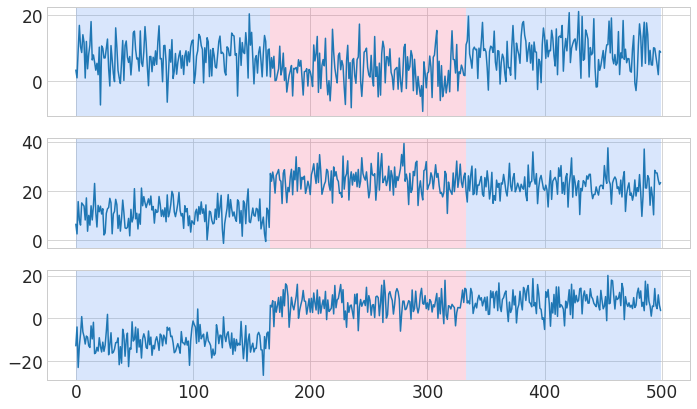

In [4]:
rpt.display(signal, bkps)

* Signal is a NumPy array of 500x3.
* bkps is the array of the change points (123, 251, and 378).

In [5]:
signal.shape

(500, 3)

In [6]:
bkps

[166, 333, 500]

* Apply Binary Segmentation to this time-series.
* Plot the predictions of the Binary Segmentation with another utility function.

(<Figure size 720x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f040b2b0950>,
       dtype=object))

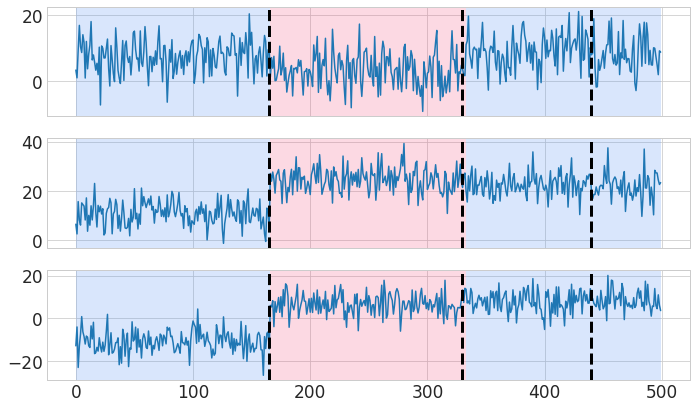

In [7]:
# "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Binseg(model="l1").fit(signal)
my_bkps = algo.predict(n_bkps=3)

# show results
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))